In [34]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
!pip install html5lib
import html5lib
import matplotlib.pyplot as plt


In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [11]:
tsl = yf.Ticker("TSLA")

In [12]:
tesla_data = tsl.history(period = "max")

In [13]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [23]:
soup = BeautifulSoup(html_data,'html.parser')

In [25]:
tables = soup.find_all("table")
tesla_table = tables[1] 

In [27]:
rows = tesla_table.find_all("tr")
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#  Use yfinance to Extract Stock Data


In [29]:
import yfinance as yf

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Use Webscraping to Extract GME Revenue Data¶

In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Step 2: Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")  # or use "html5lib"

# Step 3: Locate all tables
tables = soup.find_all("table")

# Step 4: Identify the GameStop Revenue table (likely the second one)
gme_table = tables[1]  # Adjust index if needed

# Step 5: Extract rows and clean data
rows = gme_table.find_all("tr")

data = []
for row in rows[1:]:  # Skip header
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue != "":
            data.append([date, revenue])

# Step 6: Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 7: Display last 5 rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Plot Tesla Stock Graph


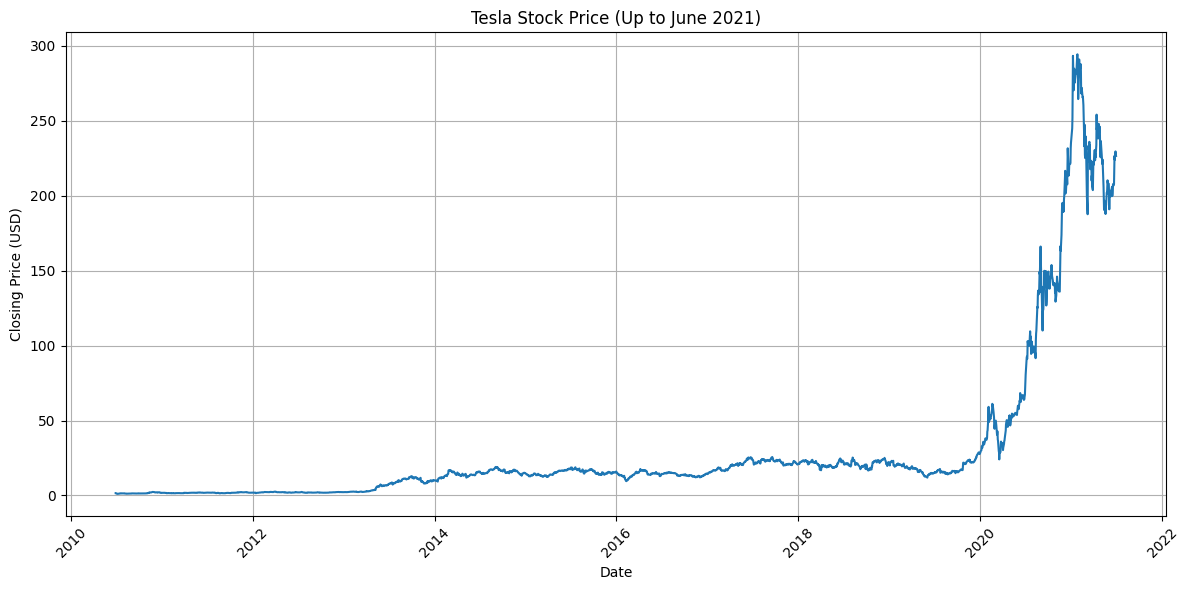

In [35]:
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Convert Date column to datetime (if not already)
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Filter data before July 1, 2021
tesla_filtered = tesla_data[tesla_data["Date"] < "2021-07-01"]
make_graph(tesla_filtered, "Tesla Stock Price (Up to June 2021)")

# Plot GameStop Stock Graph

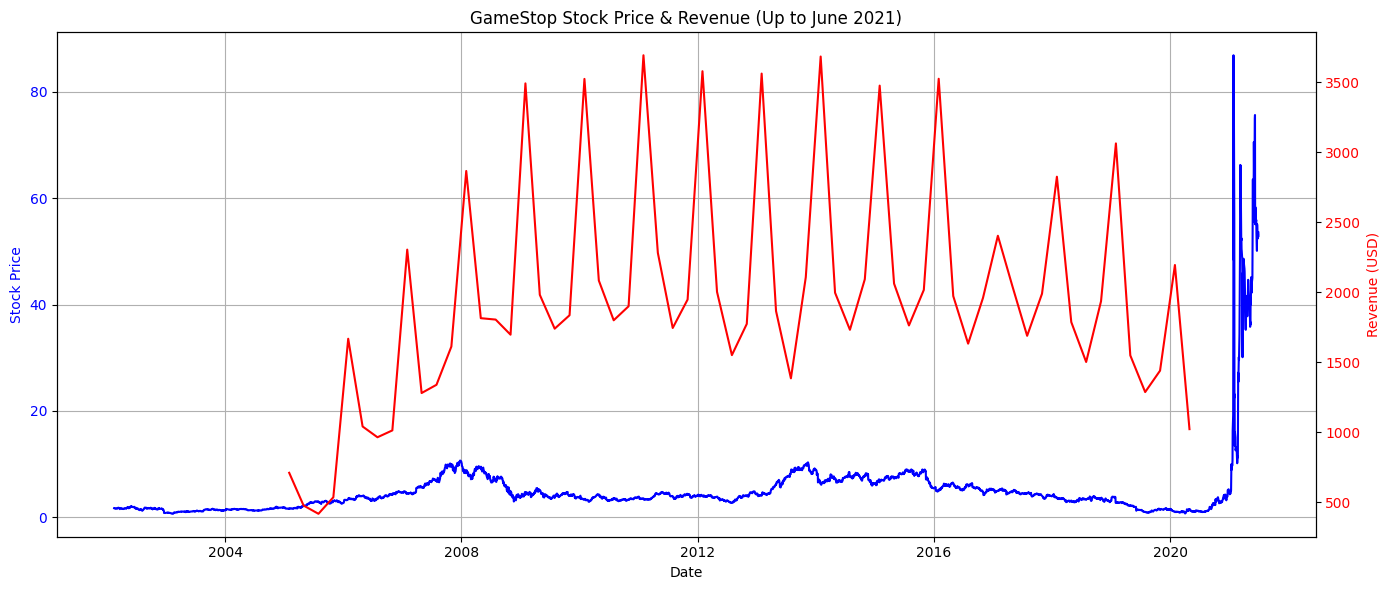

In [37]:
def make_graph(stock_data, revenue_data, stock):
    # Convert Date columns to datetime
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])

    # Filter both datasets to only include data up to June 2021
    stock_data = stock_data[stock_data["Date"] < "2021-07-01"]
    revenue_data = revenue_data[revenue_data["Date"] < "2021-07-01"]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data["Date"], stock_data["Close"], color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"{stock} Stock Price & Revenue (Up to June 2021)")
    ax1.grid(True)

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"].astype(float), color='red')
    ax2.set_ylabel("Revenue (USD)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
make_graph(gme_data, gme_revenue, 'GameStop')